## Transformer performance evaluation

In [8]:
import rdkit
from rdkit import Chem

MECH = True
def canonicalize_smiles(smiles, remove_atom_number=True, trim=True, suppress_warning=False):
    end = False
    if 'END' in smiles:
        smiles = smiles.replace('END', '')
        end = True
    # print('Mech,', MECH)
    if not MECH:
        mol = Chem.MolFromSmiles(smiles)

        if mol is None:
            cano_smiles = ""

        else:
            try:
                if trim and mol.GetNumHeavyAtoms() < 2:
                    if not suppress_warning:
                        cano_smiles = "CC"          # TODO: hardcode to ignore
                else:
                    if remove_atom_number:
                        [a.ClearProp('molAtomMapNumber') for a in mol.GetAtoms()]
                    cano_smiles = Chem.MolToSmiles(mol, isomericSmiles=True)
            except RuntimeError as e:
                cano_smiles = ""

        if end:
            cano_smiles = cano_smiles + 'END'
        return cano_smiles
    else:
        mol = Chem.MolFromSmiles(smiles, sanitize=False)

        if mol is None:
            cano_smiles = ""
        else:
            mol.UpdatePropertyCache(strict=False)
            try:
                if trim and mol.GetNumHeavyAtoms() < 2:
                    if not suppress_warning:
                        cano_smiles = "CC"          # TODO: hardcode to ignore
                else:
                    if remove_atom_number:
                        [a.ClearProp('molAtomMapNumber') for a in mol.GetAtoms()]
                    cano_smiles = Chem.MolToSmiles(mol, isomericSmiles=False)
            except RuntimeError as e:
                cano_smiles = ""

        if end:
            cano_smiles = cano_smiles + 'END'
        return cano_smiles


In [ ]:
predicted_product = []
ground_truth_product = []

import pandas as pd

with open('results/10_Sep/predictions.csv') as prediction:
    predict_pdt = pd.read_csv(prediction)
    for i in range(0,11):
        predict_pdt = predict_pdt[f'cand_precursor_{i}'].tolist()
    predict_pdt = [canonicalize_smiles(i) for i in predict_pdt]


with open('data/10_Sep/raw/raw_test.csv') as target:
    target = pd.read_csv(target)
    target_lines = [line.split('>>')[1].strip() for line in target['rxn_smiles'].tolist()]
    for line in target_lines:
        temp_line = line.replace(' ', '').strip()
        temp_line = canonicalize_smiles(temp_line)
        ground_truth_product.append(temp_line)

print(set(predict_pdt).intersection(set(ground_truth_product)))

print(len(set(predict_pdt).intersection(set(ground_truth_product)))/len(ground_truth_product))

[17:53:19] SMILES Parse Error: unclosed ring for input: 'Cc1oc(=O)oc1COC(=O)C1C2CCC(O2)N1CCN(C)CC1'
[17:53:19] SMILES Parse Error: extra open parentheses for input: 'CCC(O)C(C)C1OC1CC(C)(O)C=CC=C(C)C1OC(=O)CC(O)CCC(C)(O)C(OC([O-])(Cl)N1CCN(C2CCCCCC2)CC1'
[17:53:19] SMILES Parse Error: unclosed ring for input: 'O=C(NCCOc1ccc2c(c1)sc1ccccc1)OCc1ccccc1'
[17:53:19] SMILES Parse Error: unclosed ring for input: 'CC(CCOc1cccc(Cl)c1[n+]1[O-])CC(C)(C)C'
[17:53:19] SMILES Parse Error: extra close parentheses while parsing: N#CCOc1ccc2c(c1)C(=O)N1CCC(Oc3ccc(F)cc3)CC1)C2
[17:53:19] SMILES Parse Error: Failed parsing SMILES 'N#CCOc1ccc2c(c1)C(=O)N1CCC(Oc3ccc(F)cc3)CC1)C2' for input: 'N#CCOc1ccc2c(c1)C(=O)N1CCC(Oc3ccc(F)cc3)CC1)C2'
[17:53:19] SMILES Parse Error: ring closure 1 duplicates bond between atom 27 and atom 28 for input: 'COC1C(OCc2ccccc2)CCOCC1(OCc2ccccc2)COC1c1cc(C)c(=O)n(COCc2ccccc2)c1=O'
[17:53:19] SMILES Parse Error: extra open parentheses for input: 'CC(C)(C)[Si](Oc1ccc2c(c1)C(CC2)c1

{'COc1cc(C=O)c(OCc2cccnc2-c2ccn(CCC([O-])(O)OC)n2)cn1', 'COc1ccc([O-])c(C=O)c1', 'CC(C)(C)OC(=O)N1C(=O)CCC2(CC(=O)N(c3ccc(C([O-])=[OH+])cc3)C2)C1=O', 'Cc1c(-c2ccccc2)sc2c(Cl)c(Cl)c(O)cc12END', 'N#Cc1ccc2c(ccc(=O)n2CC([O-])(O)[NH2+]c2scc(Cl)c2-c2nc[nH]n2)c1', 'COCC(C)Oc1cc(Oc2ccc(C(C)[O-])cc2)cc(-c2ccc(-c3nccs3)[nH]2)c1', 'Cn1c(-c2cnccc2[CH]O)nc2ccc(Cl)cc21END', 'O=C1OCc2ncccc21END', 'Cc1ccc(Oc2ccc(-c3cccnc3N)cc2)cc1CEND', 'CCS(=O)(=O)c1ccc(SC)nc1-c1ccn2nc(C(F)(F)F)cc2n1END', 'O=C([O-])c1ccncc1C(=O)Nc1sc2c(c1-c1nc(C3CC3)no1)CCCC2', 'COc1ccc2ncc(SCCN3CCC(NC([O-])([OH2+])c4nc5c(cc4Cl)SCC(=O)N5)CC3)nc2c1', 'COc1cc([S-])cc(OC)c1OC', 'CCOC(=O)Cc1ccc(OC)c(-c2ccc(C(F)(F)F)cc2[CH]O)c1END', 'CC(C)(C)c1ccc([O-])c(C(C)(C)C)c1', 'COC=C(C(=O)OC)c1c(OC)ncnc1Oc1cccc(COc2ccccc2C#N)c1END', 'CC(C)(CC(=O)O)CN1CC2CN(C(=O)OC(C)(C)C)CCN2C1([O-])OCc1ccccc1', 'CCCCC(CCSc1ccc(OCC(=O)OCC)c(C)c1)c1sc2cc(C(F)(F)F)ccc2c1CEND', 'Nc1cc(O)nc([S-])n1', 'O=C(NC(CN1CCCC1)C(O)c1ccc(OC2CC2)c(Cl)c1)C(=O)c1ccc(-c2ccccn2)cc1E

In [ ]:
import jsonlines

mismatch_rxn_list = []
all_idx_list = []


with jsonlines.open('./dataset_for_training/Statistics/reaction_location_testing.json') as location_file:
    for i in location_file:
        all_idx_list.append(i['location'])
    all_idx_list_temp = []
    for index, i in enumerate(all_idx_list):
        if index != len(all_idx_list)-1:
            mismatch_rxn_list.append([i for i in range(i, all_idx_list[index+1])])
    mismatch_rxn_list.append([i for i in range(4205, 4208)])
    print(mismatch_rxn_list)

[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15], [16, 17], [18, 19], [20, 21], [22, 23], [24, 25], [26, 27], [28, 29], [30, 31], [32, 33], [34, 35], [36, 37], [38, 39], [40, 41], [42, 43], [44, 45], [46, 47], [48, 49], [50, 51], [52, 53], [54, 55], [56, 57], [58, 59], [60, 61], [62, 63], [64, 65], [66, 67], [68], [69, 70], [71, 72], [73, 74], [75, 76], [77, 78], [79, 80], [81, 82], [83, 84], [85, 86], [87, 88], [89, 90], [91], [92, 93], [94, 95], [96, 97], [98, 99], [100, 101], [102, 103], [104, 105], [106, 107], [108, 109], [110, 111], [112, 113], [114, 115], [116, 117], [118, 119], [120, 121], [122, 123], [124], [125, 126], [127, 128], [129, 130], [131, 132], [133, 134], [135, 136], [137, 138], [139, 140], [141, 142], [143, 144], [145, 146], [147, 148], [149, 150], [151, 152], [153, 154], [155, 156], [157, 158], [159], [160, 161], [162, 163], [164, 165], [166, 167], [168, 169], [170, 171], [172, 173], [174, 175], [176, 177], [178, 179], [180, 181], [182, 183], [

In [4]:
one_step = 0
two_step = 0
three_step = 0

for i in mismatch_rxn_list:
    if len(i) == 1:
        one_step += 1
    elif len(i) == 2:
        two_step += 1
    else:
        three_step += 1

print(one_step, two_step, three_step)

one_step_wrong = 0
two_step_wrong = 0
three_step_wrong = 0

faulty_output_idx = []
one_step_wrong_idx = []

for i in mismatch_rxn_list:
    for j in i:
        if j in wrong_rxn_idx:
            faulty_output_idx.append(i[0])
            if len(i) == 1:
                one_step_wrong += 1
                one_step_wrong_idx.append(i[0])
            elif len(i) == 2:
                two_step_wrong += 1
            else:
                three_step_wrong += 1
            break
print(one_step_wrong, two_step_wrong, three_step_wrong)
print('Single step accuracy: ', (one_step - one_step_wrong)/one_step*100, '%')
print('Two step accuracy: ', (two_step - two_step_wrong)/two_step*100, '%')
print('Three step accuracy: ', (three_step - three_step_wrong)/three_step*100, '%')

61 2069 3
18 207 0
Single step accuracy:  70.49180327868852 %
Two step accuracy:  89.99516674722088 %
Three step accuracy:  100.0 %


In [5]:
for i in one_step_wrong_idx:
    print(prediction_target_pair[i])

('C1CC=CCC1', 'C1CCC=CC1')
('O=C(O)C(O)C(OC1OC(CO)C(O)C(O)C1O)C(O)C(O)C1O', 'OCC(O)C(OC1OC(CO)C(O)C(O)C1O)C(O)C(O)C(O)=O')
('CCOC(=O)C1(C)CC=CC(C)C1C', 'CCOC(=O)C1(C)C(C)C=CCC1C')
('O=C1CC[NH+]1c1ccccc1', 'C=CC(=O)Nc1ccccc1')
('CC(c1ccccc1)=C1CC(c2ccccc2)=CC1c1ccccc1', 'Brc1ccc2c3c(ccc(Br)c13)C1CC(c3ccccc3)=C(c3ccccc3)CC21')
('CN1CCC(c2ccc(F)cc2)C(C(=O)O)C1=O', 'CN1CCC(c2ccc(F)cc2)C(C(O)=O)C1=O')
('CC(=O)C1CCC(C(C)=O)CC1', 'CC(=O)C1CCC(C)=C(C)C1')
('C1=CC2C(C1)C1CC2C2C3C=CC(C3)C12', 'C1=CCC2C(C1)CC1C3C=CC(C3)C21')
('CC1=C(C)c2sc(C)c(C)c2C(C)C1C', 'CC1=C(C)C(C)c2c1sc(C)c2C')
('CC(=O)OCC=C(C)CC(C)(C)C=C', 'C=C(C)C(CC=C(C)C)COC(C)=O')
('CC(C)S(=O)(=O)NCC(C)c1ccc(C2CCCCC2)cc1', 'CC(CNS(=O)(=O)C(C)C)c1ccc(C2CCCCC2)cc1')
('O=C(O)CCSCc1cccc(C(=O)Nc2ccc(N3CCCCC3)cc2-c2cc(C(=O)c3cccc(C(F)(F)F)c3)ccn2)c1', 'OC(=O)CCSCc1cccc(C(=O)Nc2ccc(N3CCCCC3)cc2-c2cc(C(=O)c3cccc(C(F)(F)F)c3)ccn2)c1')
('CC1CCCC(N2CCC(c3cc(Cl)ccc3-n3ccnn3)=CC2=O)c2nn(CC(=O)O)cc2NC1=O', 'CC1CCCC(N2CCC(c3cc(Cl)ccc3-n3ccnn3)=CC2=O

In [ ]:
faulty_rxn_list = []
with jsonlines.open('./dataset_for_training/Statistics/reaction_location_testing.json') as location_file:
    for j in location_file:
        if j['location'] in wrong_rxn_idx:
            faulty_rxn_list.append(j["Reaction"])

In [12]:
import json

## Do statistics on the mechanism

def get_mechanism(rxn_dict, step):
    mech_list = []
    rxn_dict = rxn_dict['subsequent mechanisms'][0]
    for i in range(0, step):
        mech_list.append(rxn_dict['Mechanism name'])
        if rxn_dict.get('subsequent mechanisms'):
            rxn_dict = rxn_dict['subsequent mechanisms'][0]
        else:
            continue
    return mech_list

def get_step(rxn_dict):
    if rxn_dict.get('subsequent mechanisms'):
        return get_step(rxn_dict['subsequent mechanisms'][0]) + 1
    else:
        return 0

def get_mechanism_stat(path):
    mechanism_stat = []
    with open(path, 'r') as file:
        for line in file:
            rxn_dict = json.loads(line)
            mech = get_mechanism(rxn_dict, get_step(rxn_dict))
            
            found = False
            for j in mechanism_stat:
                if j['mech'] == mech:
                    j['count'] += 1
                    found = True
                    break
            
            if not found:
                mechanism_stat.append({'mech': mech, 'count': 1})
    total_rxn_count = 0
    for i in mechanism_stat:
        print(i)
        total_rxn_count += i['count']
    print(total_rxn_count)
    return mechanism_stat

In [ ]:
with jsonlines.open('statistics/faulty_rxn_test.json', 'a') as file:
    with jsonlines.open('./dataset_for_training/testing_set_preprocess.json', 'r') as original:
        for i in original:
            if i['Reaction'] in faulty_rxn_list:
                file.write(i)

In [ ]:
src_set = get_mechanism_stat('./dataset_for_training/testing_set_preprocess.json')

{'mech': ['Deprotonation', 'SN2_Reaction'], 'count': 846}
{'mech': ['Deprotonation', 'Protonation'], 'count': 113}
{'mech': ['Nucleophilic_addition', 'Deprotonation'], 'count': 622}
{'mech': ['Deprotonation', 'SnAr_reaction'], 'count': 372}
{'mech': ['Nucleophilic_addition', 'Protonation'], 'count': 10}
{'mech': ['Diels_Alder_Reaction'], 'count': 18}
{'mech': ['Deprotonation'], 'count': 10}
{'mech': ['SN2_Reaction'], 'count': 6}
{'mech': ['Heterolytic_cleavage', 'Electrophilic_addition'], 'count': 2}
{'mech': ['SnAr_reaction'], 'count': 21}
{'mech': ['Nucleophilic_addition', 'Isomerization'], 'count': 8}
{'mech': ['Deprotonation', 'Nucleophilic_addition', 'Deprotonation'], 'count': 2}
{'mech': ['SN2_Reaction', 'SN2_Reaction'], 'count': 1}
{'mech': ['Dissociation', 'SN2_Reaction'], 'count': 29}
{'mech': ['Dissociation', 'SnAr_reaction'], 'count': 28}
{'mech': ['E2_Reaction'], 'count': 2}
{'mech': ['SN2_Reaction', 'Deprotonation'], 'count': 15}
{'mech': ['Deprotonation', 'E2_Reaction'], 

In [18]:
tgt_set = get_mechanism_stat('statistics/faulty_rxn_test.json')

{'mech': ['Nucleophilic_addition', 'Protonation'], 'count': 6}
{'mech': ['Diels_Alder_Reaction'], 'count': 6}
{'mech': ['Deprotonation'], 'count': 4}
{'mech': ['Deprotonation', 'SN2_Reaction'], 'count': 42}
{'mech': ['Heterolytic_cleavage', 'Electrophilic_addition'], 'count': 2}
{'mech': ['Deprotonation', 'SnAr_reaction'], 'count': 6}
{'mech': ['Nucleophilic_addition', 'Deprotonation'], 'count': 42}
{'mech': ['SN2_Reaction', 'SN2_Reaction'], 'count': 1}
{'mech': ['Deprotonation', 'Protonation'], 'count': 17}
{'mech': ['E2_Reaction'], 'count': 2}
{'mech': ['SN2_Reaction', 'Deprotonation'], 'count': 4}
{'mech': ['Dissociation', 'SnAr_reaction'], 'count': 2}
{'mech': ['Protonation', 'SN2_Reaction'], 'count': 1}
{'mech': ['Nucleophilic_addition', 'Elimination_reaction'], 'count': 2}
{'mech': ['Dissociation', 'SN2_Reaction'], 'count': 2}
{'mech': ['Protonation', 'Protonation'], 'count': 1}
{'mech': ['SnAr_reaction'], 'count': 2}
{'mech': ['3,3_sigmatropic_rearrangement'], 'count': 2}
{'mech

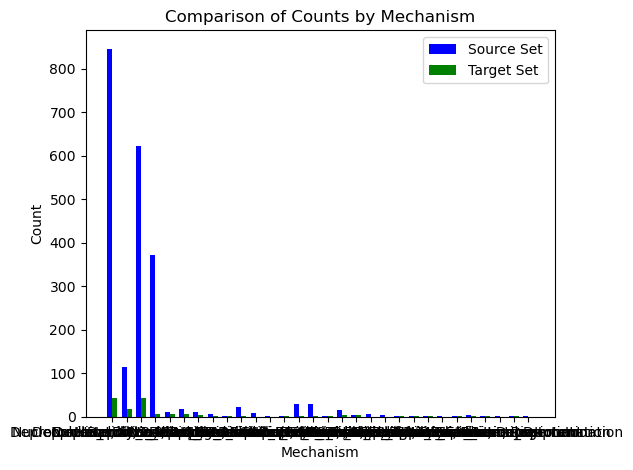

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Extract count values from each set of dictionaries
counts_src = [d['count'] for d in src_set]

# Create a dictionary to store counts from tgt_set with 'mech' as the key
counts_tgt_dict = {tuple(d['mech']): d['count'] for d in tgt_set}

# Initialize counts_tgt list with 0 values
counts_tgt = [counts_tgt_dict.get(tuple(d['mech']), 0) for d in src_set]

# Determine the maximum length between the two sets
max_length = max(len(counts_src), len(counts_tgt))

# Pad the shorter set with zeros to match the maximum length
counts_src += [0] * (max_length - len(counts_src))
counts_tgt += [0] * (max_length - len(counts_tgt))

# Calculate the number of bins for the histogram
max_count = max(max(counts_src), max(counts_tgt))
num_bins = min(max_count, 10)  # Set the number of bins, adjust as needed

# Extract the aligned 'mech' values
aligned_mech = [tuple(d['mech']) for d in src_set[:max_length]]

# Plotting the histogram
fig, ax = plt.subplots()
index = np.arange(max_length)
bar_width = 0.35

rects1 = ax.bar(index, counts_src, bar_width, color='blue', label='Source Set')
rects2 = ax.bar(index + bar_width, counts_tgt, bar_width, color='green', label='Target Set')

ax.set_xlabel('Mechanism')
ax.set_ylabel('Count')
ax.set_title('Comparison of Counts by Mechanism')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([', '.join(mech) for mech in aligned_mech])  # Combine the 'mech' values with a comma separator
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()